# Ames Housing Sale Price Analysis

Jonathan P. Newcomb

## Executive Summary

This Housing Sale Price Analysis ('Analysis') utilizes data from the Ames Housing dataset. See Data description below.  The dependent variable in this analysis will be "home sale price" and our objective will be to explore the effect of various independent factors influencing the dependent variable. 

As a preliminary matter, this analysis will begin by evaluating the basic structure of the dataset. After the data structure has been well defined using basic descriptive statistics, we will hone in on the variable "home sale price".  Using some basic data visualization techniques, we will plot a the general distribution of values for 'home sale price'.  

From there, we will analyze just two or three of a multitude of subset categories of data (80 total subsets exist) and attempt to visualize their constituency within the context of the larger context of 'Home Sale Price'.  We will then take one of the subsets of data and plot a scatterplot to  visualize the correlation between the selected independent variable and its impact on 'home sale price'.   

Finally, based on the data of two or more subsets, we will attempt to manipulate the data in some way as to engineer a new subset of data.  We will then plot this new feature of the dataset with home sale price on a scatterplot and look to see if any greater correlation exists.    



## The Data

This project uses the Ames Housing dataset, which contains information about home sales in Ames, Iowa between 2006 and 2010. The "file_path" is publically available and identified below.  Each record (row) in this dataset represents a home that was sold in Ames, IA.  Each feature (column) in this dataset is some attribute of that home sale. There are 80 attributes (columns) in total. Below, we will read in the data and import matplotlib and Pandas to perform our analysis.

In [27]:
# import data using the standard alias
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
file_path = "https://github.com/learn-co-curriculum/da-phase1-project-enterprise/raw/main/data/ames.csv"
df = pd.read_csv(file_path, index_col=0)

In [28]:
df.shape

(1460, 80)

In [29]:
df.head(3)


,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500


In [30]:
df.tail(3)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125
1460,20,RL,75.0,9937,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,6,2008,WD,Normal,147500


In [31]:
# a quick summary of the statistical information available for the numerical columns.
df.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [32]:
# there is clearly some missing data, but this project does not include cleaning.  
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

## Distribution of `SalePrice`

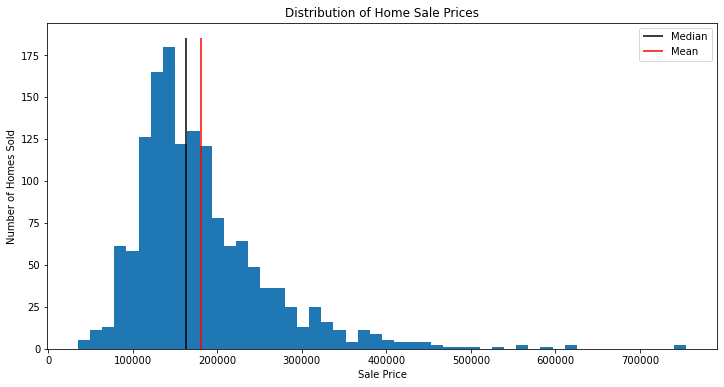

In [33]:
Home_Sale_Price = df['SalePrice']
fig, ax = plt.subplots(1, figsize=(12, 6))
ax.hist(Home_Sale_Price, bins=50)
ax.vlines(df['SalePrice'].median(), ymin=0, ymax=185, color='black', label='Median')
ax.vlines(df['SalePrice'].mean(), ymin=0, ymax=185, color='red', label='Mean')
plt.title('Distribution of Home Sale Prices')
ax.set_xlabel('Sale Price');
ax.set_ylabel('Number of Homes Sold')

plt.legend();

In the abovecaptioned graph, we have plotted the data showing the distribution of the number of homes sold at various sales prices.  The distribution is slightly skewed to the right, with some outliers pulling on the mean; the mean is indicated by the red line.  Nevertheless, for the most part, the distribution is relatively normal.  The median value, represented by the black line, is probably a good measure of the centrality of the distribution.  

## Differences between Subsets

As part of this analysis, in addition to the 'Home Sale Price' feature, we are going to review another feature of the 'Homes sold' data set and break it down into subsets in order to compare to the home sale price feature.   For this analysis, we are looking at the 'LandSlope' feature which is broken into three subset categories: 1. Gentle, 2. Moderate, and 3. Severe.   

In [34]:
# value counts gets us the number of homes sold with each subset feature of LandSlope
df['LandSlope'].value_counts()

Gtl    1382
Mod      65
Sev      13
Name: LandSlope, dtype: int64

In [35]:
# create variables for each of the subsets using Pandas.  
gtlslope_sales = df[df['LandSlope'] =='Gtl']
modslope_sales = df[df['LandSlope'] =='Mod']
sevslope_sales = df[df['LandSlope'] =='Sev']

In [36]:
# here we focus on the severe slope sales in an attempt to identify outliers.  
sevslope_sales

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
121,80,RL,NaN,21453,Pave,NaN,IR1,Low,AllPub,CulDSac,...,0,NaN,NaN,NaN,0,10,2006,WD,Normal,180000
250,50,RL,NaN,159000,Pave,NaN,IR2,Low,AllPub,CulDSac,...,0,NaN,NaN,Shed,500,6,2007,WD,Normal,277000
272,20,RL,73.0,39104,Pave,NaN,IR1,Low,AllPub,CulDSac,...,0,NaN,NaN,NaN,0,4,2008,WD,Normal,241500
314,20,RL,150.0,215245,Pave,NaN,IR3,Low,AllPub,Inside,...,0,NaN,NaN,NaN,0,6,2009,WD,Normal,375000
336,190,RL,NaN,164660,Grvl,NaN,IR1,HLS,AllPub,Corner,...,0,NaN,NaN,Shed,700,8,2008,WD,Normal,228950
376,30,RL,NaN,10020,Pave,NaN,IR1,Low,AllPub,Inside,...,0,NaN,NaN,NaN,0,3,2009,WD,Normal,61000
589,20,RL,65.0,25095,Pave,NaN,IR1,Low,AllPub,Inside,...,0,NaN,NaN,NaN,0,6,2009,WD,Partial,143000
629,60,RL,70.0,11606,Pave,NaN,IR1,HLS,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2007,WD,Family,135000
694,30,RL,60.0,5400,Pave,NaN,Reg,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,12,2006,WD,Abnorml,108480


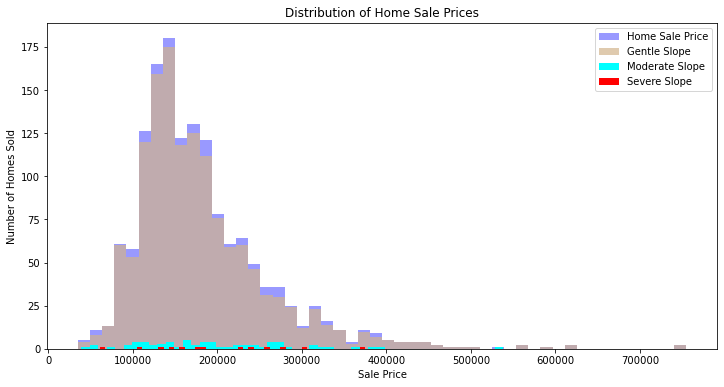

In [37]:
# we stack the home sale price, gentle slope, moderate slope and severe slope as histograms
# on the same figure using standard language.  We used more vibrant colors for 
# the foreground subsets because they are so much smaller, and we want them to 
# pop as much as possible so they dont get overlooked.  
fig, ax = plt.subplots(1, figsize=(12, 6))

ax.hist(Home_Sale_Price, bins=50, color='blue', stacked=True, alpha=.4, label='Home Sale Price')
ax.hist(gtlslope_sales['SalePrice'], bins=50, color='tan', alpha=.7, label='Gentle Slope')
ax.hist(modslope_sales['SalePrice'], bins=50, color='aqua', label='Moderate Slope')
ax.hist(sevslope_sales['SalePrice'], bins=50, color='red', label='Severe Slope')

plt.legend()
plt.title('Distribution of Home Sale Prices')
ax.set_xlabel('Sale Price');
ax.set_ylabel('Number of Homes Sold');



Well, there really is not much difference in the subsets.  most of the extreme outliers have a gentle slope, while the majority of the homes sold with a moderate and severe slope are contained within the distribution.  I would suspect that most are within one standard deviation.  Lets move on to another feature.  

## Correlation between `Lot Area` and `SalePrice`

In [38]:
# We use the code below to identify the features with correlation to the SalePrice feature.  
df.corr()['SalePrice'] 

MSSubClass      -0.084284
LotFrontage      0.351799
LotArea          0.263843
OverallQual      0.790982
OverallCond     -0.077856
YearBuilt        0.522897
YearRemodAdd     0.507101
MasVnrArea       0.477493
BsmtFinSF1       0.386420
BsmtFinSF2      -0.011378
BsmtUnfSF        0.214479
TotalBsmtSF      0.613581
1stFlrSF         0.605852
2ndFlrSF         0.319334
LowQualFinSF    -0.025606
GrLivArea        0.708624
BsmtFullBath     0.227122
BsmtHalfBath    -0.016844
FullBath         0.560664
HalfBath         0.284108
BedroomAbvGr     0.168213
KitchenAbvGr    -0.135907
TotRmsAbvGrd     0.533723
Fireplaces       0.466929
GarageYrBlt      0.486362
GarageCars       0.640409
GarageArea       0.623431
WoodDeckSF       0.324413
OpenPorchSF      0.315856
EnclosedPorch   -0.128578
3SsnPorch        0.044584
ScreenPorch      0.111447
PoolArea         0.092404
MiscVal         -0.021190
MoSold           0.046432
YrSold          -0.028923
SalePrice        1.000000
Name: SalePrice, dtype: float64

In [39]:
# now we use code to get the correlation between 'SalePrice' and 'LotArea'
df['SalePrice'].corr(df['LotArea'])

0.2638433538714056

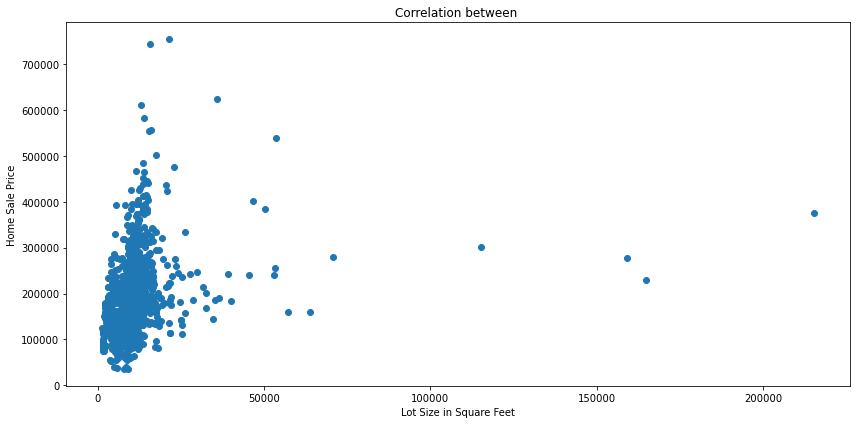

In [40]:
# Next we use a scatterplot, with SalePrice on the right and LotArea on the x axis.  
fig, ax = plt.subplots(figsize=(12, 6))
ax.scatter(df['LotArea'], df['SalePrice'])
ax.set_xlabel('Lot Size in Square Feet')
ax.set_ylabel('Home Sale Price')
ax.set_title('Correlation between ')

plt.tight_layout();

As we can see, the correlation is approximately .237, which is a fairly weak positive correlation between Lot Area and Home Sale Price.  A look at the scatterplot created above confirms the weak correlation. We can see a cluster line of plots stretching vertically along the y-axis between about 50,000 to about 450,000. Nevertheless, there is not much difference in the Lot Areas of any homes sold in that same cluster.  There are extreme outliers in both price and lot area, with far less extreme outliers having greater correlative value.  

## Engineered Feature: Total Bathrooms

Finally, we will engineer a new feature not supplied by the dataset by combining several existing features. In this case, we will create a feature called "Total Bathrooms", which will combine data extracted from the following existing features: Basement Full Bathrooms, Basement Half Bathrooms, Full Bathrooms Above Grade (excludes basement bathrooms), and Half Bathrooms Above Grade(excludes basement bathrooms). 

In [41]:
# code to obtain total bathrooms columns and add to dataframe. 
df['TotalBath'] = df['BsmtFullBath'] + df['BsmtHalfBath'] + df['FullBath'] + df['HalfBath']

In [42]:
df['TotalBath'].mean()

2.430821917808219

In [46]:
# we can now see that there is an additional column
df.shape

(1460, 81)

In [47]:
df['SalePrice'].corr(df['TotalBath'])

0.6130046086468922

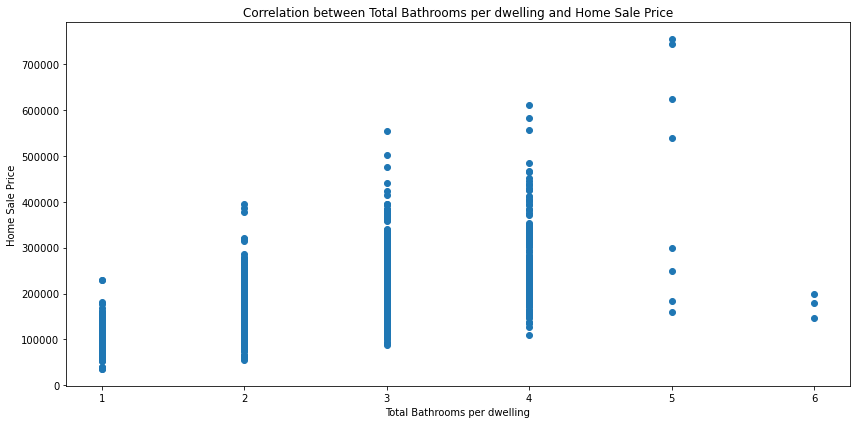

In [48]:
# now we plot the correlation with Home Sale Price and attempt to get the new feature.  
fig, ax = plt.subplots(figsize=(12, 6))
ax.scatter(df['TotalBath'], df['SalePrice'])
ax.set_xlabel('Total Bathrooms per dwelling')
ax.set_ylabel('Home Sale Price')
ax.set_title('Correlation between Total Bathrooms per dwelling and Home Sale Price')
plt.tight_layout();

There is a fairly strong positive correlation between homes that have more bathrooms and the Home Sale Price. The correlation between the two said features is approximately .613; and as we can see in the scatterplot displayed above, you can very clearly see both bottom and top line trends of increasing correlation between "Total Bathrooms" and "Home Sale Price", all the way up through five(5) bathrooms per home.  At 5 bathrooms, the trendline levels off, as there are very few homes with more than five bathrooms anyway. Had we cleaned the data, homes with six bathrooms may have been a candidate for removal.      